# Capstone Project 
# Providing data-driven suggestions for HR of Salifort Motors

### PACE stages




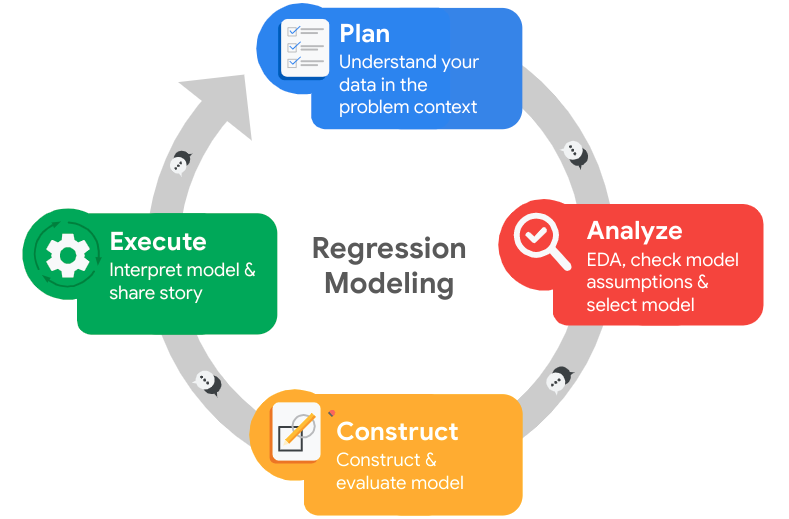



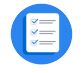

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from xgboost import XGBClassifier, XGBRegressor, plot_importance

import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns ={'Department':'department',
                     'Work_accident':'work_accident',
                     'time_spend_company':'tenure',
                     'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

In [8]:
# Check for missing values
df0.isna().sum().sum()

0

### Check duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

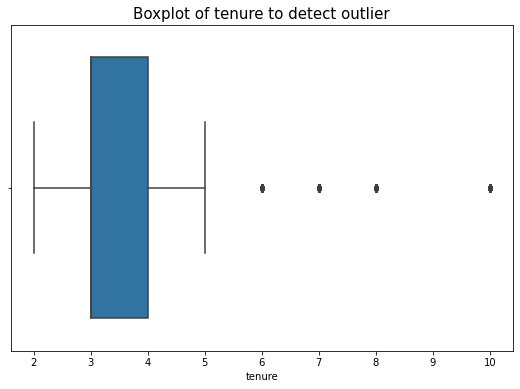

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (9,6))
plt.title('Boxplot of tenure to detect outlier', fontsize = 15)
sns.boxplot(x=df['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers

percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr 
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit:', upper_limit)
print('Lower limit:', lower_limit)

outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

print('There are', len(outliers), 'rows containing outliers in tenure')

Upper limit: 5.5
Lower limit: 1.5
There are 824 rows containing outliers in tenure


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

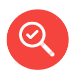
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

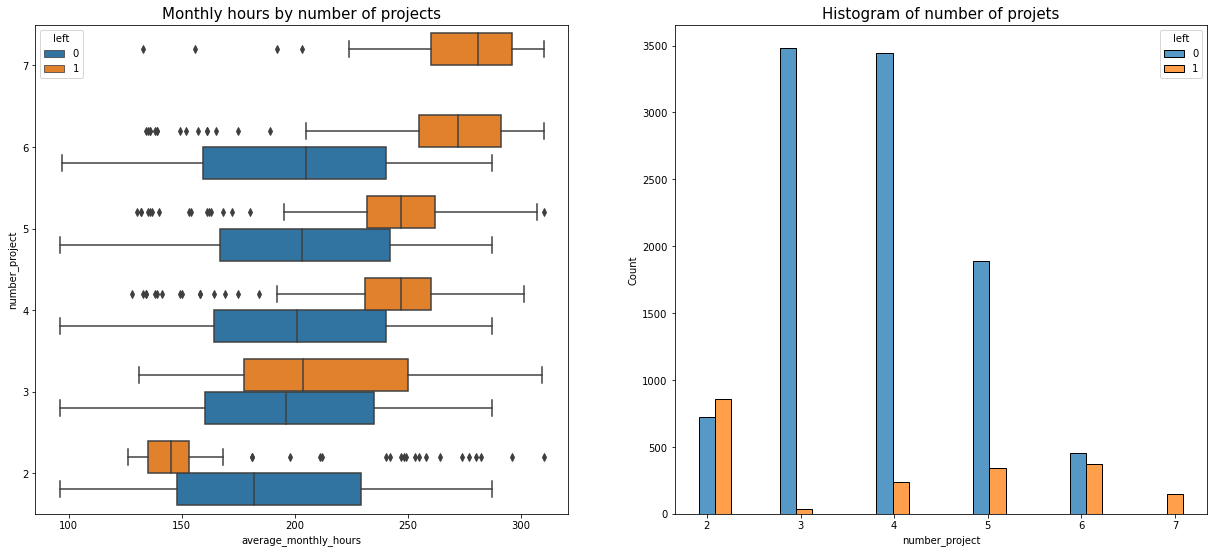

In [14]:
# Create a plot as needed

fig, ax = plt.subplots(1,2, figsize = (21,9))

sns.boxplot(x = 'average_monthly_hours', y = 'number_project', data = df, hue = 'left', orient = 'h', ax = ax[0] )
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = 15);

tenure_stay = df[df['left'] == 0]['number_project']
tenure_left = df[df['left'] == 1]['number_project']
sns.histplot(x = 'number_project', data = df, hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Histogram of number of projets', fontsize = 15);

plt.show()


Exploring in the first chart, we can notice the following assumptions:
1. Among the group of employees who have at least two projects, those who left the company worked considerably less than their peers with the same number of projects. It is possible that these individuals were already planning to leave the company, hence their reduced work input. Meanwhile, those who stayed in the company may have been the largest contributors to their respective projects.
Looking further into the distribution of projects, we can see a clear trend: employees who left the company tend to have spent more hours working than their peers with the same number of projects who remained in the company.

2. Everyone with seven projects left the company, the optimal number of projects for employees to work seems to be 3 and 4, the radio of left/stayed is very small.

3. It seems like the employees in this company are overworked, because If you assumme a work week of 40 hours and two weeks of vacation per year, `Average monthly hours = 50 weeks * 40 hours per week / 12 months = 166.67 hours` aside from the employees who worked on two projects, every group even those who stay in the company work considerably more hours. 


In [15]:
# Value counts of stayed / left employees with 7 projects
df[df['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

In [16]:
# Average hours worked of employees with 7 projects
round(df[df['number_project']== 7]['average_monthly_hours'].mean(),2)

275.62

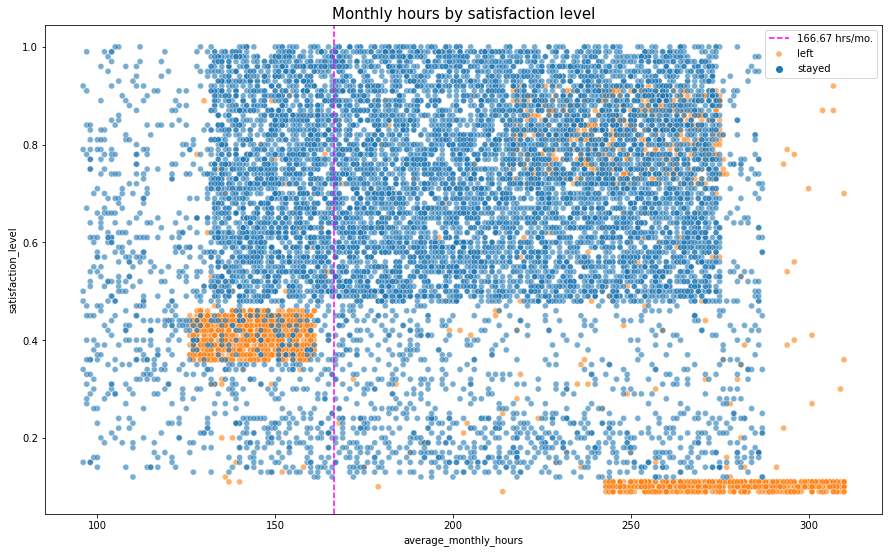

In [17]:
# Create a plot as needed

plt.figure(figsize = (15,9))
sns.scatterplot(x = 'average_monthly_hours', y = 'satisfaction_level', data = df, hue = 'left', alpha = 0.6 )
plt.axvline(x = 166.67, color = 'magenta', ls = '--', label = '166.67 hours / mo')
plt.legend(labels = ['166.67 hrs/mo.','left','stayed'])
plt.title('Monthly hours by satisfaction level', fontsize = 15);


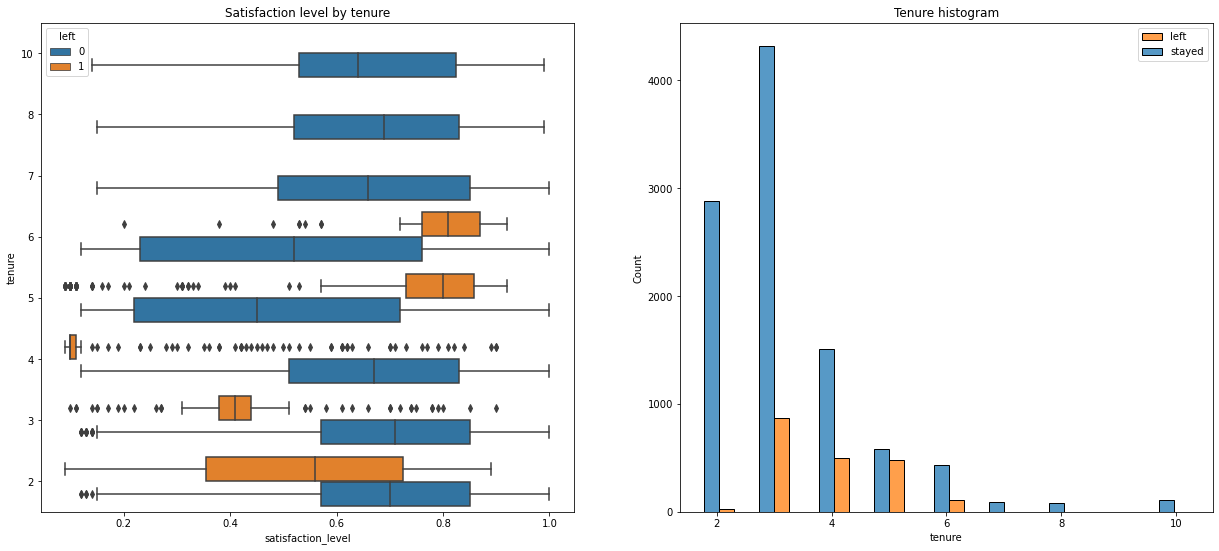

In [18]:
# Create a plot as needed

fig, ax = plt.subplots(1,2, figsize = (21,9))

sns.boxplot(x = 'satisfaction_level', y = 'tenure', data = df, ax = ax[0], hue = 'left', orient = 'h')
ax[0].set_title ('Satisfaction level by tenure')
ax[0].invert_yaxis()



tenure_stayed = df[df['left'] == 1 ]['tenure']
tenure_left = df[df['left'] == 0 ]['tenure']
sns.histplot(x = 'tenure', data = df, hue = 'left', multiple = 'dodge', shrink = 6, ax = ax[1])
ax[1].set_title('Tenure histogram')
ax[1].legend(labels =['left','stayed']);

In [19]:
df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


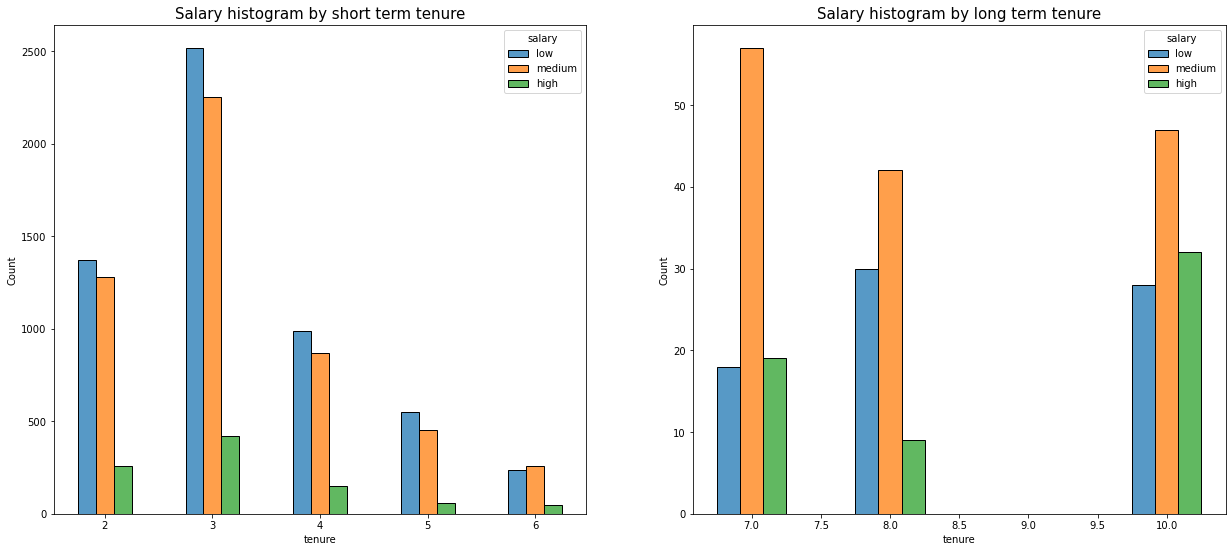

In [20]:
# Create a plot as needed

fig, ax = plt.subplots(1,2, figsize = (21,9))

tenure_short = df[df['tenure'] < 7]
tenure_long = df[df['tenure'] > 6]

sns.histplot(x = 'tenure', data = tenure_short, hue = 'salary', discrete = 1, 
             hue_order = ['low','medium','high'], multiple = 'dodge', shrink = 0.5, ax = ax[0])
ax[0].set_title('Salary histogram by short term tenure', fontsize = 15)

sns.histplot(x = 'tenure', data = tenure_long, hue = 'salary', discrete = 1, 
             hue_order = ['low','medium','high'], multiple = 'dodge', shrink = 0.5, ax = ax[1])
ax[1].set_title('Salary histogram by long term tenure', fontsize = 15)

plt.show();

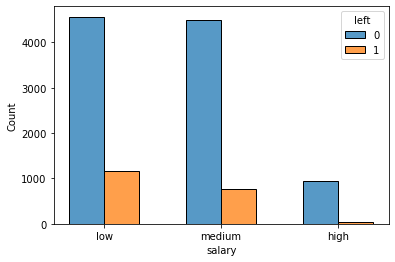

In [79]:
# Create a plot as needed

sns.histplot(x='salary', data = df, hue = 'left', discrete = 1, hue_order = [0,1], multiple = 'dodge', shrink = 0.6);

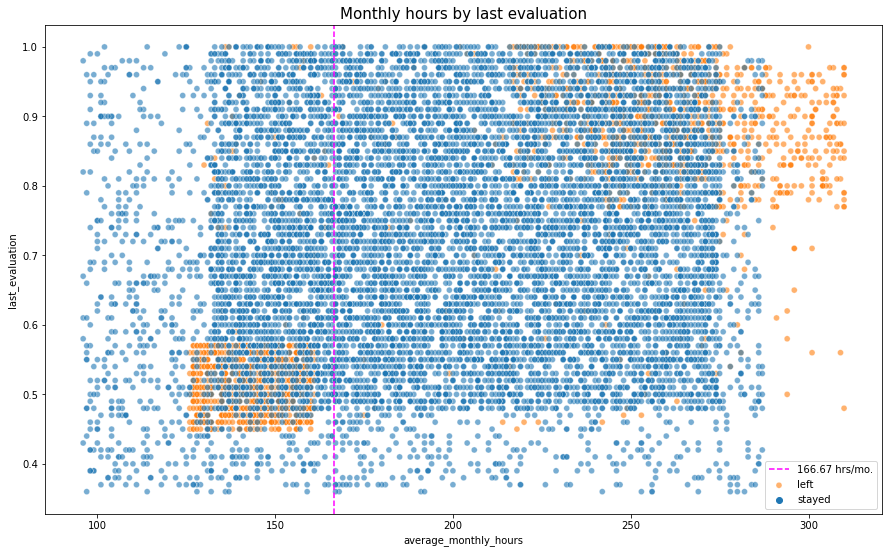

In [21]:
# Create a plot as needed

plt.figure(figsize = (15,9))
sns.scatterplot(x = 'average_monthly_hours', y = 'last_evaluation', data = df, hue = 'left', alpha = 0.6 )
plt.axvline(x = 166.67, color = 'magenta', ls = '--', label = '166.67 hours / mo')
plt.legend(labels = ['166.67 hrs/mo.','left','stayed'])
plt.title('Monthly hours by last evaluation', fontsize = 15);

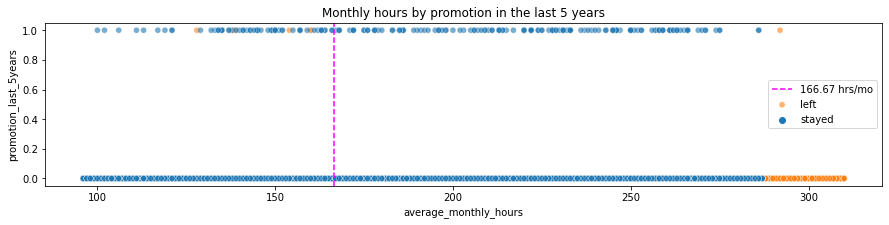

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15,3))
sns.scatterplot(x = 'average_monthly_hours', y = 'promotion_last_5years', data = df, hue = 'left', alpha = .6)
plt.axvline(x = 166.67, color = 'magenta', ls = '--')
plt.title('Monthly hours by promotion in the last 5 years')
plt.legend(labels = ['166.67 hrs/mo','left','stayed']);

In [23]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Counts people stay/left by department')

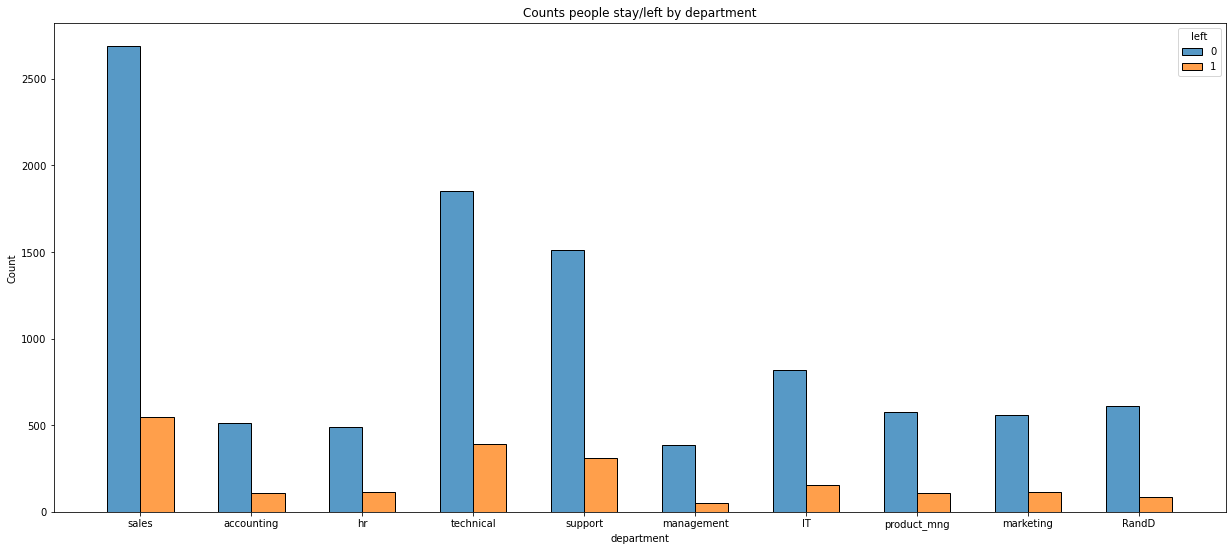

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (21,9))
sns.histplot(x = 'department', data = df, hue ='left', discrete = 1, hue_order =[0,1], multiple = 'dodge', shrink = 0.6)
plt.title('Counts people stay/left by department')

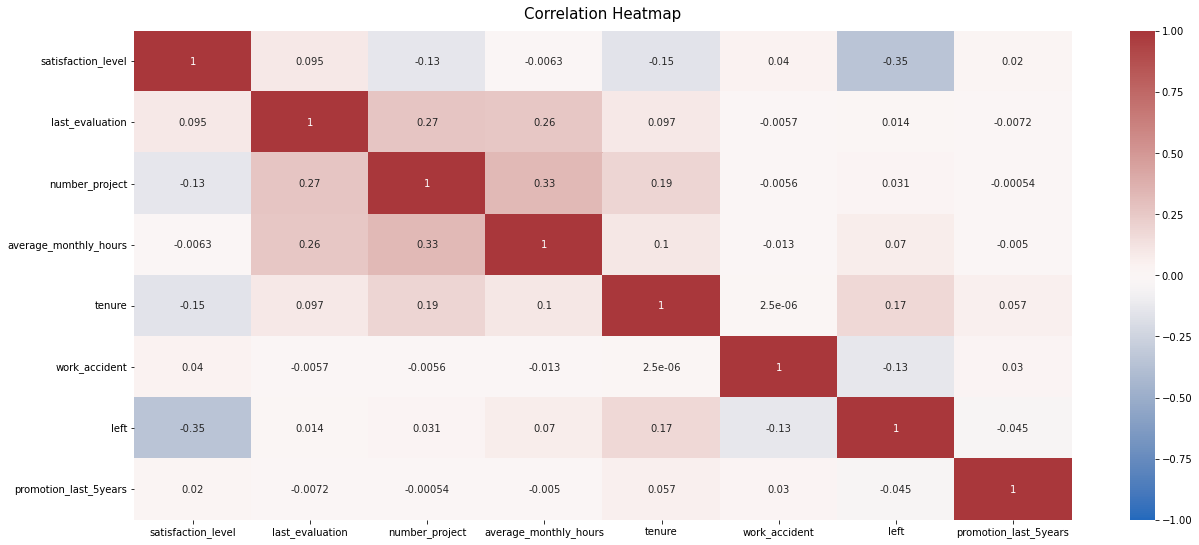

In [25]:
plt.figure(figsize = (21,9))
fig = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
fig.set_title('Correlation Heatmap', fontsize = 15, pad = 12);

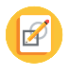
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling Approach A: Logistic Regression Model

The following approach covers implementation of Logistic Regresion

In [26]:
# One - hot encode for the categorical variables
df_oh = pd.get_dummies(df, columns = ['salary', 'department'] ,prefix = ['salary', 'dept'], drop_first = False )

df_oh.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


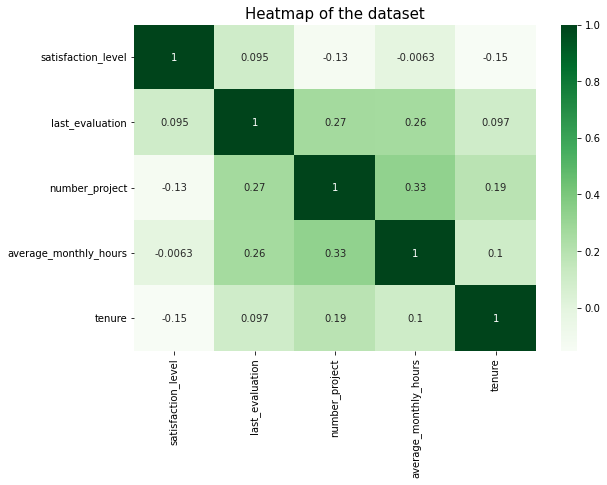

In [27]:
#Heatmap to visualize how correlated variables are
plt.figure(figsize = (9,6))
sns.heatmap(df[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']].corr(),
             annot = True, cmap = 'Greens')
plt.title('Heatmap of the dataset', fontsize = 15)
plt.show();

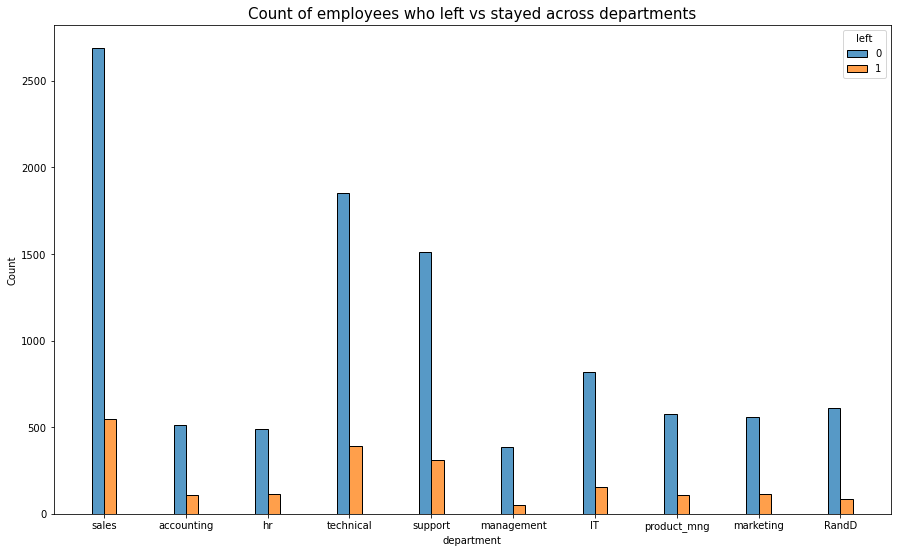

In [28]:
plt.figure(figsize = (15,9))
sns.histplot(x = 'department', data = df, hue = 'left', hue_order = [0,1], multiple = 'dodge', shrink = 0.3)
plt.title('Count of employees who left vs stayed across departments', fontsize = 15)
plt.show();

In [29]:
# Removing outliers identified earlier
df_logreg = df_oh[(df_oh['tenure'] >= lower_limit) & (df_oh['tenure']<= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Isolate the outcome variable
y = df_logreg['left']

# Features for the model
X = df_logreg.copy()
X = X.drop('left', axis = 1)

# Split the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [31]:
# Constructing a logistic regresion model
log_cls = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [32]:
# Using the regresion model to predict on the test set
y_pred = log_cls.predict(X_test)

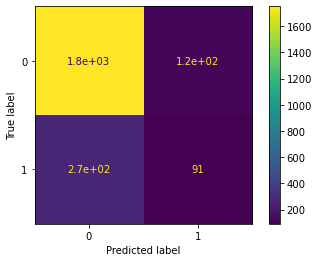

In [33]:
# Compute values, display and ploting confusion Matrix
log_cm = confusion_matrix(y_test,y_pred, labels = log_cls.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_cls.classes_)

log_disp.plot()

In [34]:
# Checking for imbalance in the y variable
df_logreg['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [35]:
target_names = ['Predicted would not leave','Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.87      0.94      0.90      1871
    Predicted would leave       0.43      0.25      0.32       363

                 accuracy                           0.82      2234
                macro avg       0.65      0.59      0.61      2234
             weighted avg       0.80      0.82      0.81      2234



There is aprox 83%-17% split. The data not is perfectly balance, but no it's too imbalance so not going to be required to make a resample process to make it more balanced.

The classification reports, shows that the logistic regresion model, achieve a precision of 80%, recall of 82% and f1-score of 81% (all weighted avg), and accuracy of 82%.

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest

### Decision Tree: Round 1 

In [36]:
df2 = pd.get_dummies(df)
df2.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
# Isolate the outcome variable 
y = df2['left']

# Select the features
X = df2.copy()
X = X.drop('left', axis = 1)

# Creating the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,  random_state = 0)

# Creating train and validate data 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 0)

In [38]:
# Instantiate model 
tree = DecisionTreeClassifier(random_state = 0)

# Assigning the hyperparameters
cv_params = {'max_depth':[4,6,8, None],
             'min_samples_split':[2,4,6],
             'min_samples_leaf':[2,5,1]
            }

# Creating a dictionary of scoring metrics 
scoring = {'accuracy','precision','recall','f1','roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [39]:
%%time 
tree1.fit(X_tr, y_tr)

CPU times: user 2.49 s, sys: 0 ns, total: 2.49 s
Wall time: 2.49 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [40]:
# Check the best parameters 
print('Best parameters:',tree1.best_params_)

# Check best AUC score on CV
print('Best AUC score:', tree1.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best AUC score: 0.9703634179699269


This is a strong AUC score, which shows this model can predict employees who will leave very well

In [41]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [42]:
# Getting all CV scores 
tree1_cv_results = make_results('Decision Tree CV', tree1, 'auc')
tree1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,Decision Tree CV,0.970363,0.922167,0.921337,0.921719,0.974007


All of these scores from decision tree model are strong indicators of good model performance. Also trees can be vulnerable to overfitting. Random forest avoid overfitting by incorporate multiple trees to make predictions.

### Random forest: Round 1 

Building a random forest model and set up cross-validated gridsearch to find the best predictions for the model. 

In [43]:
# Instantiate model 
rf = RandomForestClassifier(random_state = 0)

# Assigning the hyperparameters for the model
cv_params = {'max_depth':[3,5,None],
             'max_features':[1.0],
             'max_samples':[0.7, 1.0],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[2,3,4],
             'n_estimators':[300,500],
            }

# Creating a dictionary of scoring values 
scoring = {'accuracy','precision','recall','f1','roc_auc'}

# Instantiate GridSearch 
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [95]:
%%time
rf1.fit(X_tr,y_tr)

CPU times: user 7min 48s, sys: 638 ms, total: 7min 49s
Wall time: 7min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
# Define a path to save the model
path = '/home/jovyan/work/'

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [45]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

In [98]:
write_pickle(path, rf1, 'rf1_sm')

In [46]:
rf1 = read_pickle(path, 'rf1_sm')

In [47]:
print('Best parameters:', rf1.best_params_)
print('Best AUC score:', rf1.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Best AUC score: 0.9795790967836983


In [48]:
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')
all_cv_results = [rf1_cv_results, tree1_cv_results]
all_cv_results = pd.concat(all_cv_results)
all_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,Random Forest CV,0.979579,0.943576,0.923021,0.933145,0.978037
0,Decision Tree CV,0.970363,0.922167,0.921337,0.921719,0.974007


The evaluation scores of the `Random Forest` model have better scores than those of the `Decision Tree`

#### Evaluating this models on the validation set


In [49]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for the model
    '''
    
    preds = model.best_estimator_.predict(X_test_data)
    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds),3)
    recall = round(recall_score(y_test_data, preds),3)
    f1 = round(f1_score(y_test_data, preds),3)
    precision = round(precision_score(y_test_data, preds),3)
    
    table = pd.DataFrame({'Model':[model_name],
                          'AUC': [auc],
                          'Accuracy':[accuracy],
                          'Recall':[recall],
                          'F1':[f1],
                          'Precision':[precision]
                         })
    return table    

In [50]:
tree1_val_results = get_scores('Decision Tree VAL', tree1, X_val, y_val)
rf1_val_results = get_scores('Random Forest VAL', rf1, X_val, y_val)

all_results_val = [tree1_val_results, rf1_val_results]
all_results_val = pd.concat(all_results_val).sort_values(by = 'AUC', ascending = False)
all_results_val

,Model,AUC,Accuracy,Recall,F1,Precision
0,Random Forest VAL,0.954,0.979,0.917,0.936,0.955
0,Decision Tree VAL,0.952,0.974,0.920,0.922,0.924


The `Random Forest` model outperforms the decision tree model across most of the metrics.  With the validation set.

#### Using the best performing model (RF) to predict on the test set 

In [51]:
rf1_test_scores = get_scores('Random Forest TEST', rf1, X_test, y_test)
rf1_test_scores

,Model,AUC,Accuracy,Recall,F1,Precision
0,Random Forest TEST,0.955,0.98,0.917,0.938,0.961


This appers to be a strong model, the test scores are very similar to the validation set. We can be confident that this models performance in this data it's representatice of how it will be perform on new unseen data. 

### Feature Engineering

There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

**The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.**

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. so we proceed to dropping the column

In [52]:
# Dropping the column 'satisfaction level' and create 'overworked ' column
df3 = df2.copy()
df3 = df3.drop('satisfaction_level', axis = 1)

df3['overworked'] = df3['average_monthly_hours']

# Inspecting the max an min values for average monthly hours
print('Max:', df3['overworked'].max())
print('Min:', df3['overworked'].min())

Max: 310
Min: 96


The average monthly hours for someone who works, 8 hours per day, 5 days per week and 52 weeks per year it's approximately **166.67 hours / month**

So for this case we assume that more than **175 hours / month** on average it's overworked

In [53]:
# Define overworked as working > 175 hours / month
df3['overworked'] = (df3['overworked'] > 175).astype(int)
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [54]:
df3 = df3.drop('average_monthly_hours', axis = 1)
df3.head(10)

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.86,5,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0.88,7,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0.77,6,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
7,0.85,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
8,1.00,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
9,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [55]:
# Isolating the outcome variable 
y = df3['left']

# Selecting the features 
X = df3.copy()
X = X.drop('left', axis = 1)

# Creating the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

# Creating the train and validating data 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 0)

### Decision Tree: Round 2

In [56]:
# Instantiate model 
tree = DecisionTreeClassifier(random_state = 0)

# Creating the hyperparameters
cv_params = {'max_depth':[4,6,8, None],
             'min_samples_leaf':[2,5,1],
             'min_samples_split':[2,4,6]
            }
# Assinging a dictionary for scoring metrics 
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [57]:
%%time 
tree2.fit(X_tr, y_tr)

CPU times: user 2.1 s, sys: 0 ns, total: 2.1 s
Wall time: 2.1 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [58]:
# Checking the best parameters and AUC score on CV
print('Best parameters', tree2.best_params_)
print('Best parameters', tree2.best_score_)

Best parameters {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best parameters 0.9527727678471668


In [59]:
# Checking the other scores
tree2_cv_results = make_results('Decision Tree 2 CV', tree2, 'auc')
tree2_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,Decision Tree 2 CV,0.952773,0.864826,0.902098,0.883024,0.960245


There are some scores very good, but others fell. That's to be expected given the fewer features were take into account in this round of the model

### Random Forest: Round 2

In [60]:
# Instantiate model 
rf = RandomForestClassifier(random_state = 0)

# Creating the hyperparameters
cv_params = {'max_depth':[3,5, None],
             'max_features':[1.0],
             'max_samples':[0.7,1.0],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[2,3,4],
             'n_estimators':[300,500],
            }
# Assinging a dictionary for scoring metrics 
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch 
rf2 = GridSearchCV(rf, cv_params, scoring = scoring, refit = 'roc_auc')

In [66]:
%%time
rf2.fit(X_tr, y_tr)

CPU times: user 7min 55s, sys: 1.09 s, total: 7min 56s
Wall time: 7min 56s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [61]:
# write_pickle(path, rf2, 'rf2_sm')
rf2 = read_pickle(path, 'rf2_sm')

In [62]:
# Checking the best parameters and best AUC score on CV
print ('Best parameters:', rf2.best_params_)
print ('Best AUC score:', rf2.best_score_)

Best parameters: {'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
Best AUC score: 0.9650151616933218


In [63]:
# Get all CV scores 
rf2_cv_results = make_results('Random Forest 2 CV', rf2, 'auc')
all_cv_results = [tree2_cv_results, rf2_cv_results]
all_cv_results = pd.concat(all_cv_results)
all_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,Decision Tree 2 CV,0.952773,0.864826,0.902098,0.883024,0.960245
0,Random Forest 2 CV,0.965015,0.911050,0.890377,0.900567,0.967334


The evaluation scores of the `Random Forest` model have better scores than those of the `Decision Tree`

#### Testing the models on the validation set

In [64]:
tree2_val_results = get_scores('Decision Tree 2 VAL', tree2, X_val, y_val)
rf2_val_results = get_scores('Random Forest 2 VAL', rf2, X_val, y_val)

all_val_results = [tree2_val_results, rf2_val_results]
all_val_results = pd.concat(all_val_results).sort_values(by='AUC', ascending = False)
all_val_results

,Model,AUC,Accuracy,Recall,F1,Precision
0,Decision Tree 2 VAL,0.942,0.965,0.907,0.895,0.883
0,Random Forest 2 VAL,0.933,0.966,0.884,0.896,0.907


The model of `Random Forest`on the validation set, it appears that performs slighyly better than the decision tree, across most of the evaluation metrics.

#### Using the best performing model (RF) to predict on the test set 

In [66]:
rf2_test_scores = get_scores('Random Forest 2 TEST', rf2, X_test, y_test)
rf2_test_scores

,Model,AUC,Accuracy,Recall,F1,Precision
0,Random Forest 2 TEST,0.934,0.964,0.889,0.892,0.894


This model seems to be stable, well performing final model

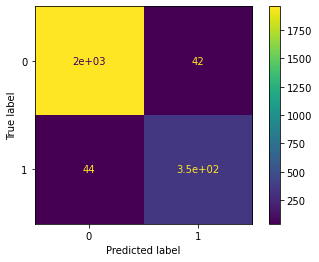

In [65]:
# Generating the array of values for Confusion Matrix and ploting the CM
preds = rf2.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)

disp.plot();

In the confusion matrix, It seems that the model predicts more false positives than false negatives. Wich means that some employees may be identified as at risk to leave the company or getting fired, when actually not it's the case.

But this is a still strong model.

#### Decision tree figure splits

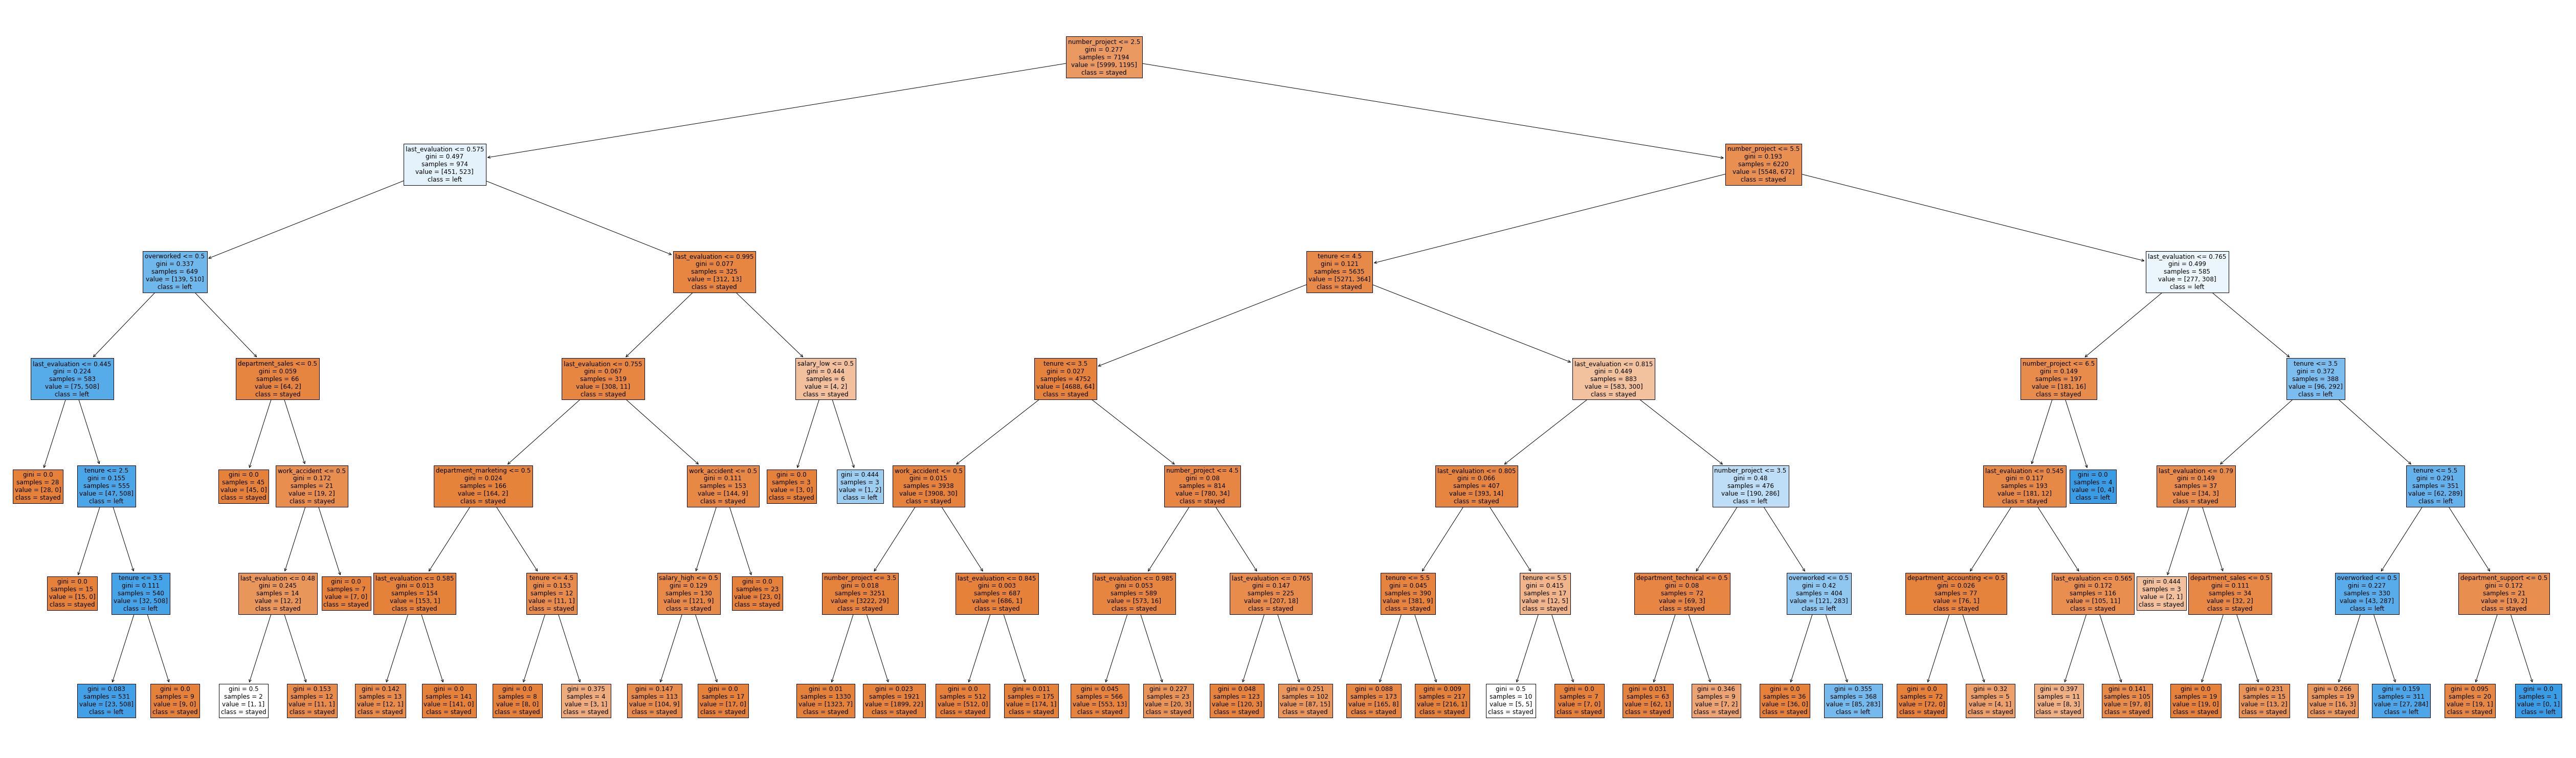

In [70]:
plt.figure(figsize = (90, 27))
plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 12, feature_names = X.columns, 
          class_names={0:'stayed',1:'left'}, filled = True);
plt.show()

#### Decision tree feature importance

In [73]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending = False)

tree2_importances = tree2_importances[tree2_importances['gini_importance']!= 0]
tree2_importances

,gini_importance
number_project,0.381767
last_evaluation,0.353482
tenure,0.169771
overworked,0.091517
department_support,0.001099
salary_low,0.000853
department_technical,0.000429
department_sales,0.000357
work_accident,0.000282
department_accounting,0.000239


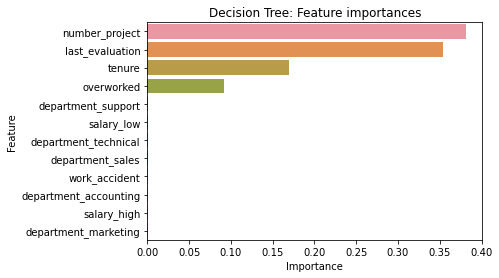

In [74]:
sns.barplot(x = 'gini_importance', y = tree2_importances.index, data = tree2_importances, orient = 'h')
plt.title('Decision Tree: Feature importances', fontsize = 12)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

The barplot shows that in the decision tree the features or variables with more importance was `number_project`, `last_evaluation`, `tenure` and `overworked`. Thes variables are the most helpful in predicting the outcome variable `left`.

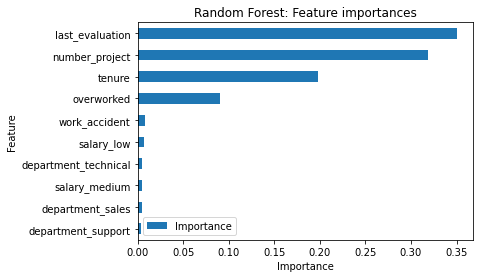

In [78]:
# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Get feature importance 
feat_impo = rf2.best_estimator_.feature_importances_[ind]

# Creating the graph 
y_df = pd.DataFrame({'Feature':feat, 'Importance':feat_impo})
y_sort_df = y_df.sort_values('Importance')
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x = 'Feature', y = 'Importance')

ax1.set_title('Random Forest: Feature importances')
ax1.set_ylabel('Feature')
ax1.set_xlabel('Importance');

The barplot shows that in the decision tree the features or variables with more importance was `last_evaluation`, `number_project`, `tenure` and `overworked` have the highest importance. Thes variables are the most helpful in predicting the outcome variable `left`.

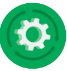
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders




## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

### Summary of model results

##### Logistic Regression Model
The Logistic Regression Model achieved: 

* Precision: 80% (weighted average) 
* Recall: 82% (weighted average)
* f1-score: 81% (weighted average)
* Accuracy: 82%

Achieved on the test set

#### Tree-based Machine Learning
After conducting feature engineering, the decision random forest model achieved:

* AUC: 93.4%
* Accuracy: 96.4%
* Recall: 88.9%
* f1-score: 89.2%
* Precision: 89.4%

The decision tree model slightly underperformed the decision tree model

### Conclusion, Recommendations, Next Steps

The following recomendations could be present to the stakeholders, this recomendations are based on the feature importances of the Random Forest Model: (`last_evaluation`, `number_project`, `tenure`, `overworked`), to retain employees:

* High evaluation scores should not be reserved for employees who work 175+ hours per month. Consider to implement a proportional scale for rewarding employees based on their level of contibution an effort. 
* Set a limit on the number of projects that employees can work on. 
* Conduct a further investigation about why four-year tenure employees are so dissatisfied. Consider promoting employees who have been in the company for atleast four years.
* Reward employees for working longer hours, if the expectations around workload and time off aren't explicit, make them clear

**Next Steps**

It could be prudent to consider how predictions change when `last_evaluation` is dropping from the data, it may be justified in the context about data leakage. Because it's possible that evaluation's aren't performed very frequently, in wich case would be useful to be able to predict employee retention without this feature. 